In [16]:
# Import libraries & configure settings
import magpy as mp
import os
import scanpy as sc
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import scvelo as scv
import diffxpy.api as de
import numpy as np
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

combined_path = "/proj/magness/CDS010-014-015_combined/"

#Saving figures as SVGs
# sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'AE-ACC-panels/'
sc.settings.figdir = fig_path

plt.rcParams ['figure.facecolor'] = 'white'

adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



In [17]:
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list


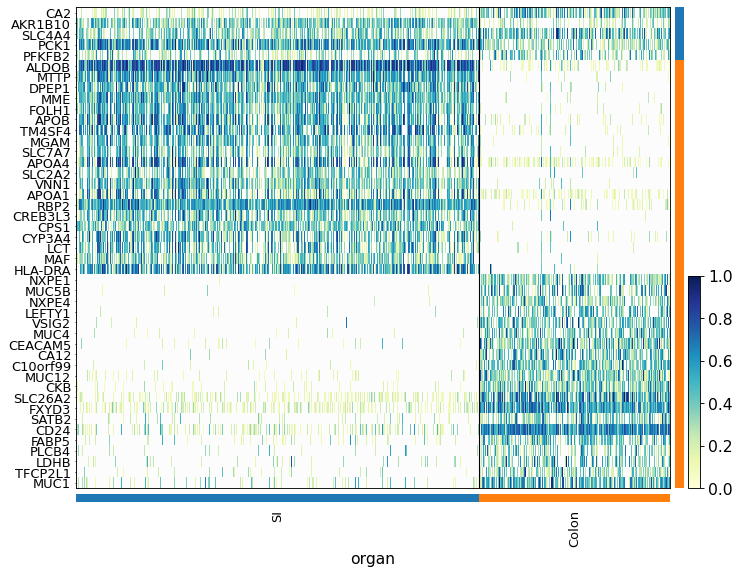

In [18]:
### Panel 13A - "Pan-absorptive" Heatmap for All ACCs vs. All AEs DEGs ###

# Define SI and colon subsets
SI_subset = adata[adata.obs.organ=='SI']
C_subset = adata[adata.obs.organ=='Colon']
subset = adata[adata.obs.type=='absorptive'] # Includes Early, Intermediate, Mature AEs and Early and Late ACCs. Doesn't include AE2s.

gene_dict = {
    'Absorptive_genes':['CA2',	'AKR1B10',	'SLC4A4',	'PCK1',	'PFKFB2'],
    'SI_abs_diff_genes':['ALDOB',	'MTTP',	'DPEP1',	'MME',	'FOLH1',	'APOB',	'TM4SF4',	'MGAM',	'SLC7A7',	'APOA4',	'SLC2A2',	'VNN1',	'APOA1',	'RBP2',	'CREB3L3',	'CPS1',	'CYP3A4',	'LCT',	'MAF',	'HLA-DRA'],
    'C_abs_diff_genes':['NXPE1',	'MUC5B',	'NXPE4',	'LEFTY1',	'VSIG2',	'MUC4',	'CEACAM5',	'CA12',	'C10orf99',	'MUC12',	'CKB',	'SLC26A2',	'FXYD3',	'SATB2',	'CD24',	'FABP5',	'PLCB4',	'LDHB',	'TFCP2L1',	'MUC1']
}

subset.obs.organ.cat.reorder_categories(['SI','Colon'], inplace=True)

sc.pl.heatmap(subset, gene_dict, groupby = 'organ', swap_axes = True, show_gene_labels = True, cmap = mp.blues, standard_scale = 'var') #save = 'PanAbsorptive_Heatmap'


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



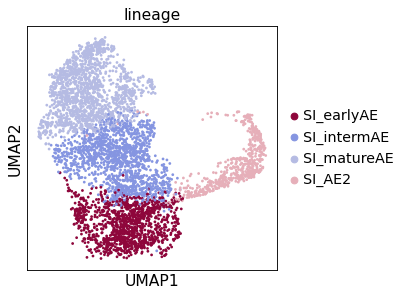

Trying to set attribute `.uns` of view, copying.


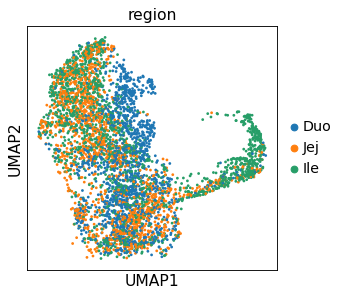

In [19]:
##Figure 13B
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

subset = adata[adata.obs['lineage'].isin(['SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2'])]

sc.pl.umap(subset, color = ['lineage'])
sc.pl.umap(subset, color = ['region'])

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



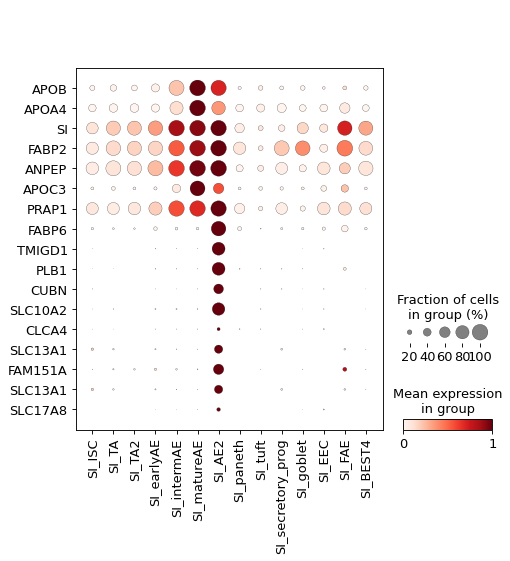

In [9]:
###Figure 13C
###AE2 DEGs
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")


subset = adata[adata.obs['organ']=='SI',:]

gene_list = mp.filter_genes(adata, [
'APOB','APOA4','SI','FABP2','ANPEP','APOC3','PRAP1',
    'FABP6','TMIGD1','PLB1','CUBN','SLC10A2','CLCA4','SLC13A1','FAM151A','SLC13A1','SLC17A8'   
])

subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#, save="AE2_dotplot")


Trying to set attribute `.var` of view, copying.


The following genes were filtered out:
[]

The following genes were filtered out:
[]

The following genes were filtered out:
[]

The following genes were filtered out:
[]

The following genes were filtered out:
[]

The following genes were filtered out:
[]

The following genes were filtered out:
[]



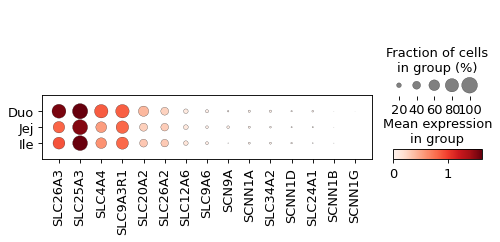

In [11]:
##Figure 13D #Amino_Acid
subset = adata[adata.obs.lineage.isin(['SI_earlyAE','SI_intermAE','SI_matureAE','C_earlyCC','C_lateCC'])]

#lipids
gene_list = mp.filter_genes(adata, ['APOA4','APOA1','APOB','FABP2','PCK1','MTTP','PDK4','DGAT1','APOC3','ACSL5','PCK2','LPGAT1','CREB3L3','GK','MFSD2A','SCARB1','CD36','FABP1'])

#Amino Acids
gene_list = mp.filter_genes(adata, ['SLC15A1','SLC6A19','SLC7A7','SLC3A1','SLC3A2','SLC25A15','SLC6A6','SLC7A8','SLC7A9','SLC36A1','SLC38A10','SLC38A10','SLC7A1','SLC25A38','SLC43A2','SLC25A29','SLC25A38','SLC43A2','SLC1A5','SLC25A12','SLC38A4','SLC25A12'])

#sugars
gene_list = mp.filter_genes(adata, ['SLC5A1','SLC2A5','SLC2A2','SLC5A9','SLC23A1','SLC5A4','SLC2A9','SLC25A11','SLC2A10'])

##Cholesterol
gene_list = mp.filter_genes(adata, ['NPC1L1','SCARB1','ABCG5','ABCG8'])

## Digestive Enzymes
gene_list = mp.filter_genes(adata, ['ANPEP', 'SI', 'LCT', 'MGAM', 'ENPEP', 'DPP4', 'PEPD', 'ALPI', 'LIPA','TMPRSS15'])

## Aquaporins
gene_list = mp.filter_genes(adata, ['AQP1','AQP3','AQP10','AQP7','AQP11','AQP8'])

## Ion Transporters  
gene_list = mp.filter_genes(adata, ['SLC25A3','SLC12A6','SLC26A3','SLC26A2','SLC4A4','SLC20A2','SLC9A3R1','SLC9A6','SLC34A2','SLC24A1','SCN9A','SCNN1D','SCNN1A','SCNN1G','SCNN1B'])


gene_list = sort_list_by_mean(subset, gene_list, groupby='region')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'region')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



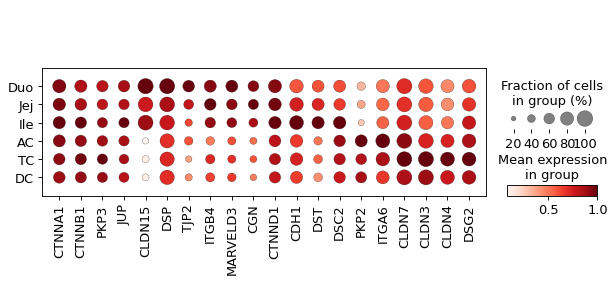

In [12]:
### Panel 13E - Barrier Function (Cell Junctions)###

combined_path = "/proj/magness/CDS010-014-015_combined/"
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs.lineage.isin(['SI_earlyAE','SI_intermAE','SI_matureAE','C_earlyACC','C_lateACC'])]
subset = mp.scale_adata(subset,groupby='region')

# Manually re-sort the top 20 sorted by means to emphasize regional trends
gene_list = ['CTNNA1','CTNNB1','PKP3','JUP','CLDN15','DSP','TJP2','ITGB4','MARVELD3','CGN','CTNND1','CDH1','DST','DSC2','PKP2','ITGA6','CLDN7','CLDN3','CLDN4','DSG2']
sc.pl.dotplot(subset, var_names=gene_list,groupby = 'region',layer = 'raw_scaled') #save = "Cell_Junction_AEs_ACCs_v2" 



Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



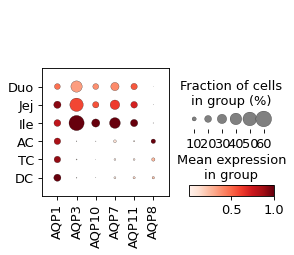

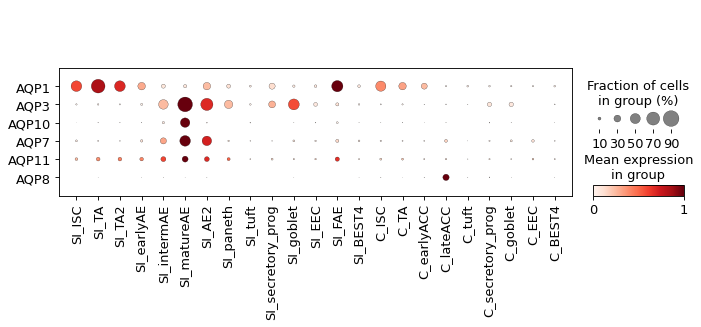

In [13]:
### Panel 13F,G - Aquaporins: ACCs vs AEs by region and lineage ###
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs.lineage.isin(['SI_earlyAE','SI_intermAE','SI_matureAE','C_earlyACC','C_lateACC'])]
subset = mp.scale_adata(subset,groupby='region')

# Manual ordering of AQP by region
gene_list = ['AQP1','AQP3','AQP10','AQP7','AQP11','AQP8']
sc.pl.dotplot(subset, var_names=gene_list,groupby = 'region',layer = 'raw_scaled') #save = "AQP_AEs_ACCs_Region_v2"

# Manual ordering of AQP (for all cell lineages)
adata = mp.scale_adata(adata)
adata.obs.lineage = adata.obs.lineage.cat.reorder_categories(['SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_paneth', 'SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC', 'SI_FAE', 'SI_BEST4','C_ISC','C_TA', 'C_earlyACC','C_lateACC', 'C_tuft','C_secretory_prog','C_goblet','C_EEC','C_BEST4'])
sc.pl.dotplot(adata, var_names=gene_list,groupby = 'lineage',swap_axes=True,layer = 'raw_scaled') #save = "AQP_AEs_ACCs_Lineage"

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.42.h5ad



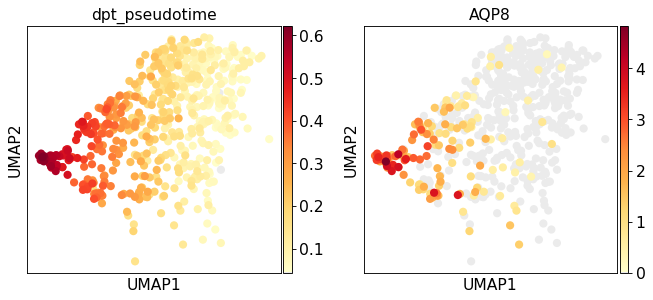

In [20]:
### Panel 13H - AQP8 UMAP by pseudotime (subpopulation of LateACC) ###

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.42.h5ad") #experimental version for pseudotime
subset = adata[adata.obs['lineage']=='C_lateCC',:]
sc.pl.umap(subset, color=['dpt_pseudotime','AQP8'], cmap = mp.reds) #save = "AQP_pseudotime_UMAP"